Text(0, 0.5, 'Суммарный объём продаж')

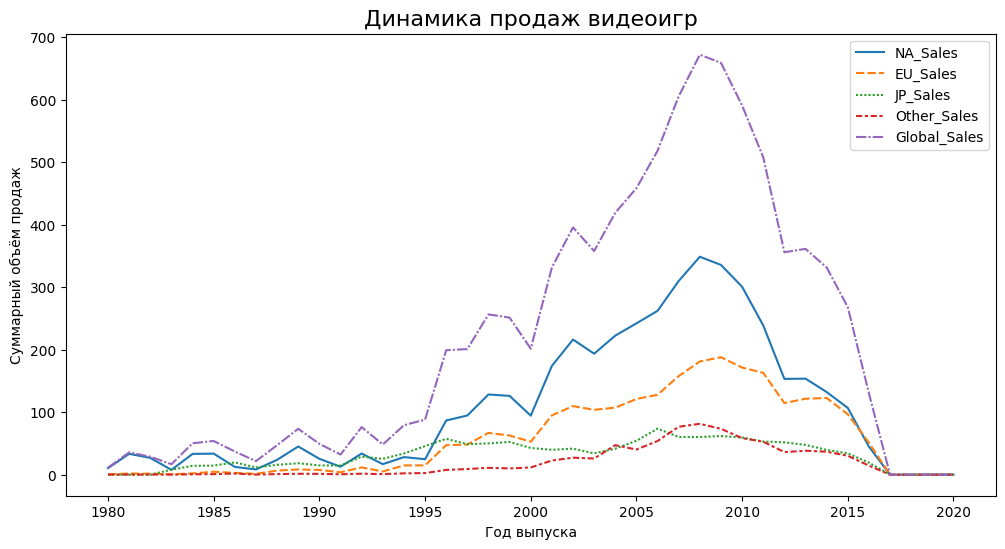

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

Text(0, 0.5, 'Количество объектов')

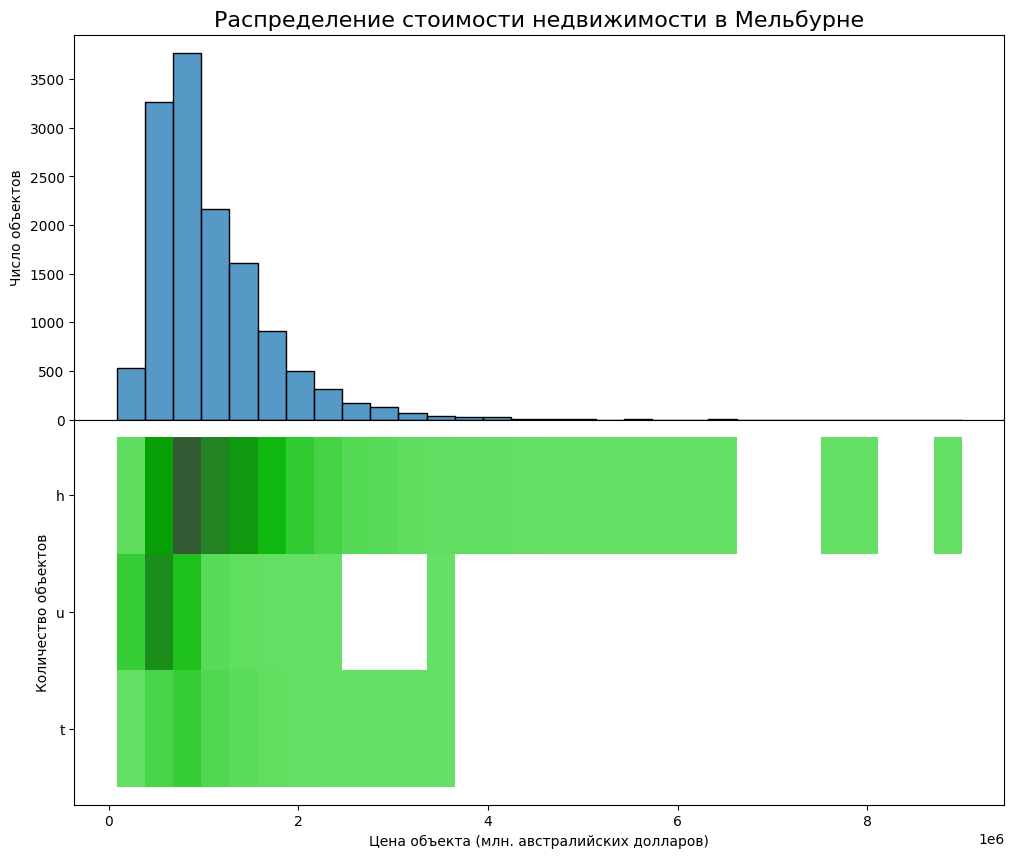

In [39]:
melb_data = pd.read_csv('data/melb_data.csv', sep=',')
fix, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data,
    x='Price',
    bins=30,
    ax=axes[0]
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize = 16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Количество объектов')

In [40]:
covid_data = pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

In [41]:
covid_data.head()

date province/state country  confirmed  deaths  recovered
0  01/22/2020          Anhui   China        1.0     0.0        0.0
1  01/22/2020        Beijing   China       14.0     0.0        0.0
2  01/22/2020      Chongqing   China        6.0     0.0        0.0
3  01/22/2020         Fujian   China        1.0     0.0        0.0
4  01/22/2020          Gansu   China        0.0     0.0        0.0

## Предобработка данных

In [42]:
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
covid_data.head()

date      country  confirmed  deaths  recovered  active  \
11337 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
11570 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
11807 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
12051 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
12299 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

       daily_confirmed  daily_deaths  daily_recovered  
11337              NaN           NaN              NaN  
11570              0.0           0.0              0.0  
11807              0.0           0.0              0.0  
12051              0.0           0.0              0.0  
12299              0.0           0.0              0.0

In [43]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [44]:
covid_data.tail()

date                         country  confirmed  deaths  \
15933 2020-03-12  occupied Palestinian territory        0.0     0.0   
16595 2020-03-14  occupied Palestinian territory        0.0     0.0   
16938 2020-03-15  occupied Palestinian territory        0.0     0.0   
17290 2020-03-16  occupied Palestinian territory        0.0     0.0   
17645 2020-03-17  occupied Palestinian territory        0.0     0.0   

       recovered  active  daily_confirmed  daily_deaths  daily_recovered  
15933        0.0     0.0              0.0           0.0              0.0  
16595        0.0     0.0              0.0           0.0              0.0  
16938        0.0     0.0              0.0           0.0              0.0  
17290        0.0     0.0              0.0           0.0              0.0  
17645        0.0     0.0              0.0           0.0              0.0

In [45]:
covid_data['date'].min()

Timestamp('2020-01-22 00:00:00')

In [46]:
vaccinations_data['date'].max()

Timestamp('2021-09-06 00:00:00')

In [48]:
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

In [66]:
covid_df['death_rate'] = (covid_df['deaths'] / covid_df['confirmed']) * 100
covid_df['recover_rate'] = (covid_df['recovered'] / covid_df['confirmed']) * 100
mask = covid_df['country'] == 'United States'
mask2 = covid_df['death_rate'].notnull()
covid_df[mask & mask2][['death_rate', 'confirmed', 'deaths']].sort_values(by='death_rate')

death_rate  confirmed   deaths
82542    0.000000        1.0      0.0
82543    0.000000        1.0      0.0
82544    0.000000        2.0      0.0
82545    0.000000        2.0      0.0
82546    0.000000        5.0      0.0
...           ...        ...      ...
82657    6.071115  1469104.0  89191.0
82654    6.075227  1391915.0  84562.0
82655    6.086073  1418928.0  86357.0
82656    6.092746  1444045.0  87982.0
82584    7.189542      153.0     11.0

[494 rows x 3 columns]

In [68]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

np.float64(67.06)